### For more details on this accident: https://www.space.com/31732-space-shuttle-challenger-disaster-explained-infographic.html

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

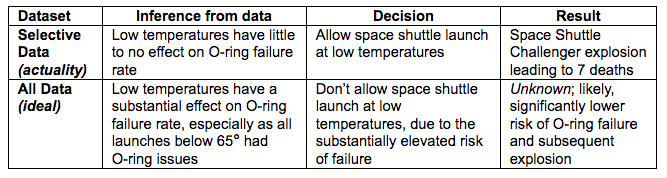

In [2]:
from IPython.display import Image as Im
from IPython.display import display
Im('shuttle.png')

In [5]:
data=np.array([[float(j) for j in e.strip().split()] for e in open("chall.txt")])
data

array([[66.,  0.],
       [70.,  1.],
       [69.,  0.],
       [68.,  0.],
       [67.,  0.],
       [72.,  0.],
       [73.,  0.],
       [70.,  0.],
       [57.,  1.],
       [63.,  1.],
       [70.,  1.],
       [78.,  0.],
       [67.,  0.],
       [53.,  1.],
       [67.,  0.],
       [75.,  0.],
       [70.,  0.],
       [81.,  0.],
       [76.,  0.],
       [79.,  0.],
       [75.,  1.],
       [76.,  0.],
       [58.,  1.]])

In [6]:
# Fit logistic regression model
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols

In [7]:
dat = pd.DataFrame(data, columns=['Temperature', 'Failure'])
logit_model = logit('Failure ~ Temperature', dat).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Failure   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Fri, 06 Nov 2020   Pseudo R-squ.:                  0.2813
Time:                        08:23:29   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
Covariance Type:            nonrobust   LLR p-value:                  0.004804
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.0429      7.379      2.039      0.041       0.581      29.505
Temperature    -0.2322      0.108     -2.145      0.032      -0.444      -0.020
===============================================================================
"""

In [8]:
# The summary shows a -ve correlation b/w Temperature and Failure

In [9]:
# Predict failure possibility for new temperatures
x = np.linspace(50, 80, 100)
p = logit_model.params
eta = p['Intercept'] + x*p['Temperature']
y = np.exp(eta) / (1 + np.exp(eta))

In [10]:
y

array([0.96877352, 0.96657362, 0.96422446, 0.96171675, 0.95904072,
       0.95618615, 0.95314237, 0.94989821, 0.94644206, 0.94276186,
       0.93884513, 0.93467894, 0.93025002, 0.92554473, 0.92054913,
       0.91524905, 0.90963011, 0.90367784, 0.89737776, 0.89071544,
       0.88367666, 0.87624752, 0.86841456, 0.86016493, 0.85148654,
       0.84236827, 0.83280008, 0.82277331, 0.81228078, 0.80131706,
       0.78987864, 0.77796417, 0.76557462, 0.75271348, 0.73938695,
       0.72560404, 0.71137675, 0.6967201 , 0.68165224, 0.66619444,
       0.65037104, 0.63420942, 0.61773982, 0.60099521, 0.58401104,
       0.56682501, 0.54947668, 0.53200721, 0.51445892, 0.4968749 ,
       0.47929862, 0.46177343, 0.44434221, 0.42704692, 0.40992818,
       0.39302494, 0.37637412, 0.36001033, 0.34396558, 0.32826912,
       0.31294726, 0.29802326, 0.28351728, 0.26944634, 0.2558244 ,
       0.24266237, 0.22996826, 0.21774727, 0.20600199, 0.19473253,
       0.18393676, 0.17361046, 0.16374756, 0.15434033, 0.14537

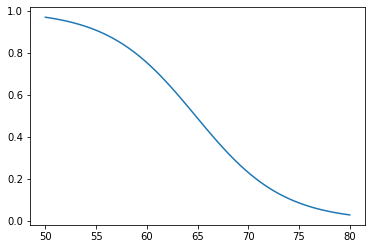

In [13]:
# Plot data
plt.plot(x,y)